In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### In this notebook, we will conduct a cluster analysis explore the similarities and differences between each countries. The goal is to identify patterns and groupings within the data that can provide valuable insights into the relationships and characteristics of different countries.

Loading the dataset

In [5]:
df = pd.read_csv('/kaggle/input/agri-food-co2-emission-dataset-forecasting-ml/Agrofood_co2_emission.csv')
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


Reformatting the column names

In [6]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
countries = df['area'].values
df.head()

,area,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils_(co2),pesticides_manufacturing,food_transport,forestland,...,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_-_male,total_population_-_female,total_emission,average_temperature_°c
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


# Feature aggregation

Aggregating the features by area and calculating the mean for each country.

In [7]:
# aggregating the features using the mean 
temp = df.drop('year', axis=1)
cols = temp.select_dtypes(include='number').columns
df_grouped = temp.groupby('area').agg({col:'mean' for col in cols})
df_grouped.reset_index(inplace=True)
df_grouped.head()

,area,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils_(co2),pesticides_manufacturing,food_transport,forestland,net_forest_conversion,...,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_-_male,total_population_-_female,total_emission,average_temperature_°c
0,Afghanistan,15.088268,0.057477,316.749416,652.752835,0.000000,37.696717,206.740474,-823.084694,0.000000,...,619.335623,0.0,0.0,NaN,1.910243e+07,5.879019e+06,1.231930e+07,1.212108e+07,7354.053024,0.817043
1,Albania,5.479452,6.920468,37.332081,208.644010,109.796535,4.808637,199.839132,-583.764029,0.000000,...,522.261561,0.0,0.0,243.147055,1.602519e+06,1.447305e+06,1.532884e+06,1.531393e+06,3696.333040,0.886694
2,Algeria,55.966177,83.767077,279.698342,2.462010,0.000000,49.161290,2693.397119,-1031.938477,390.495252,...,288.877848,0.0,0.0,138.550023,1.208942e+07,2.192896e+07,1.717102e+07,1.653005e+07,40441.284232,1.164661
3,American Samoa,0.000000,0.000000,NaN,1158.468224,0.000000,11.481085,14.289010,-51.536487,8.325829,...,NaN,0.0,0.0,30.451342,7.273871e+03,4.803539e+04,2.713742e+04,2.645381e+04,5498.122660,0.850089
4,Andorra,0.000000,0.000000,NaN,926.342278,0.000000,11.481085,39.210445,0.000000,0.000000,...,NaN,0.0,0.0,58.507465,6.884548e+03,6.575887e+04,3.589603e+04,3.365468e+04,5287.553280,1.283871


# Imputing Missing Values

In [8]:
df_grouped.isna().sum()

area                                0
savanna_fires                       1
forest_fires                        3
crop_residues                      40
rice_cultivation                    0
drained_organic_soils_(co2)         0
pesticides_manufacturing            0
food_transport                      0
forestland                         16
net_forest_conversion              16
food_household_consumption         16
food_retail                         0
on-farm_electricity_use             0
food_packaging                      0
agrifood_systems_waste_disposal     0
food_processing                     0
fertilizers_manufacturing           0
ippu                               24
manure_applied_to_soils            31
manure_left_on_pasture              0
manure_management                  31
fires_in_organic_soils              0
fires_in_humid_tropical_forests     5
on-farm_energy_use                 32
rural_population                    0
urban_population                    0
total_popula

We have a lot of missing values in our dataset which will cause a problem. So, we will impute these missing values using the K Nearest Neighbors algorithm. 

In [9]:
from sklearn.impute import KNNImputer
cols = df_grouped.select_dtypes(include='number').columns
df_impute_values = df_grouped[cols].values

knn_imputer = KNNImputer(n_neighbors = 5)
df_imputed_values = knn_imputer.fit_transform(df_impute_values)

df_imputed = pd.DataFrame(df_imputed_values, columns=cols)
df_imputed['area'] = df_grouped['area']

df_imputed.head()

,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils_(co2),pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,...,fires_in_organic_soils,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_-_male,total_population_-_female,total_emission,average_temperature_°c,area
0,15.088268,0.057477,316.749416,652.752835,0.000000,37.696717,206.740474,-823.084694,0.000000,466.443616,...,0.0,0.0,406.155719,1.910243e+07,5.879019e+06,1.231930e+07,1.212108e+07,7354.053024,0.817043,Afghanistan
1,5.479452,6.920468,37.332081,208.644010,109.796535,4.808637,199.839132,-583.764029,0.000000,84.632374,...,0.0,0.0,243.147055,1.602519e+06,1.447305e+06,1.532884e+06,1.531393e+06,3696.333040,0.886694,Albania
2,55.966177,83.767077,279.698342,2.462010,0.000000,49.161290,2693.397119,-1031.938477,390.495252,13243.906735,...,0.0,0.0,138.550023,1.208942e+07,2.192896e+07,1.717102e+07,1.653005e+07,40441.284232,1.164661,Algeria
3,0.000000,0.000000,0.009770,1158.468224,0.000000,11.481085,14.289010,-51.536487,8.325829,0.631913,...,0.0,0.0,30.451342,7.273871e+03,4.803539e+04,2.713742e+04,2.645381e+04,5498.122660,0.850089,American Samoa
4,0.000000,0.000000,0.016892,926.342278,0.000000,11.481085,39.210445,0.000000,0.000000,2.562623,...,0.0,0.0,58.507465,6.884548e+03,6.575887e+04,3.589603e+04,3.365468e+04,5287.553280,1.283871,Andorra


In [10]:
df_imputed.isna().sum()

savanna_fires                      0
forest_fires                       0
crop_residues                      0
rice_cultivation                   0
drained_organic_soils_(co2)        0
pesticides_manufacturing           0
food_transport                     0
forestland                         0
net_forest_conversion              0
food_household_consumption         0
food_retail                        0
on-farm_electricity_use            0
food_packaging                     0
agrifood_systems_waste_disposal    0
food_processing                    0
fertilizers_manufacturing          0
ippu                               0
manure_applied_to_soils            0
manure_left_on_pasture             0
manure_management                  0
fires_in_organic_soils             0
fires_in_humid_tropical_forests    0
on-farm_energy_use                 0
rural_population                   0
urban_population                   0
total_population_-_male            0
total_population_-_female          0
t

No more missing values!

# Scaling

Scaling plays a crucial role in the execution of a clustering algorithm. To ensure accurate results, it is essential to scale the data, preventing the algorithm from merely prioritizing the largest values. Moreover, scaling enables us to make meaningful feature comparisons across the dataset, leading to more insightful and reliable cluster analysis.

In [11]:
from sklearn.preprocessing import MinMaxScaler

cols = df_imputed.select_dtypes(include='number').columns
scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(df_imputed[cols])

df_scaled = pd.DataFrame(scaled_values, columns=cols)
df_scaled.head()

,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils_(co2),pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,...,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_-_male,total_population_-_female,total_emission,average_temperature_°c
0,0.000273,0.000002,1.160512e-02,0.004355,0.000000,0.002971,0.003663,0.966098,0.000000,0.002074,...,0.009647,0.0,0.0,0.001639,0.023982,0.009833,0.018078,0.018587,0.076531,0.445314
1,0.000099,0.000226,1.367773e-03,0.001392,0.000526,0.000379,0.003541,0.966457,0.000000,0.000376,...,0.008134,0.0,0.0,0.000981,0.002012,0.002421,0.002249,0.002348,0.074742,0.498319
2,0.001014,0.002735,1.024764e-02,0.000016,0.000000,0.003875,0.047753,0.965785,0.000315,0.058881,...,0.004496,0.0,0.0,0.000559,0.015178,0.036677,0.025198,0.025348,0.092717,0.709857
3,0.000000,0.000000,3.506262e-07,0.007729,0.000000,0.000905,0.000251,0.967255,0.000007,0.000003,...,0.000052,0.0,0.0,0.000123,0.000009,0.000080,0.000039,0.000040,0.075623,0.470463
4,0.000000,0.000000,6.115612e-07,0.006180,0.000000,0.000905,0.000693,0.967332,0.000000,0.000011,...,0.000030,0.0,0.0,0.000236,0.000009,0.000110,0.000052,0.000051,0.075520,0.800577


In [12]:
df_scaled.describe()

,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils_(co2),pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,...,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_-_male,total_population_-_female,total_emission,average_temperature_°c
count,2.360000e+02,2.360000e+02,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,...,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,2.314506e-02,2.973099e-02,0.030562,0.027388,0.018965,0.025729,0.035670,0.939240,0.013042,0.019975,...,0.034039,0.004463,0.020876,0.014472,0.022419,0.028731,0.025955,0.026807,0.104329,0.487935
std,9.011470e-02,1.099816e-01,0.121723,0.114814,0.083707,0.106206,0.100898,0.122660,0.072614,0.096417,...,0.126970,0.065129,0.097557,0.077319,0.108664,0.105183,0.109243,0.109117,0.103160,0.212294
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.938973e-08,1.709908e-07,0.000008,0.001379,0.000000,0.000905,0.000671,0.961682,0.000000,0.000059,...,0.000309,0.000000,0.000000,0.000072,0.000133,0.000447,0.000339,0.000356,0.075536,0.353920
50%,5.636156e-05,6.677633e-05,0.002135,0.003685,0.000000,0.001506,0.003998,0.967031,0.000225,0.000714,...,0.003142,0.000000,0.000000,0.000916,0.002198,0.004177,0.003907,0.004140,0.079181,0.438970
75%,2.497114e-03,3.229832e-03,0.010453,0.010347,0.003309,0.009719,0.022732,0.967332,0.004925,0.006049,...,0.015669,0.000000,0.000565,0.004794,0.010800,0.014388,0.014396,0.015507,0.090263,0.634187
max,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now all of our values are between 0 and 1.

# Choosing the Number of clusterss

Prior to executing the clustering algorithm, we need to determine the number of clusters we want. To achieve this, we will employ both the Elbow Method and the Silhouette Method. While using either of these methods is generally sufficient, I decided to apply both in this case out of personal curiosity. Specifically, I want to better understand the Silhouette Method, and this presented an excellent opportunity for me to gain deeper insights into its workings since it's my first time using it.

<Axes: xlabel='Clusters', ylabel='WSS'>

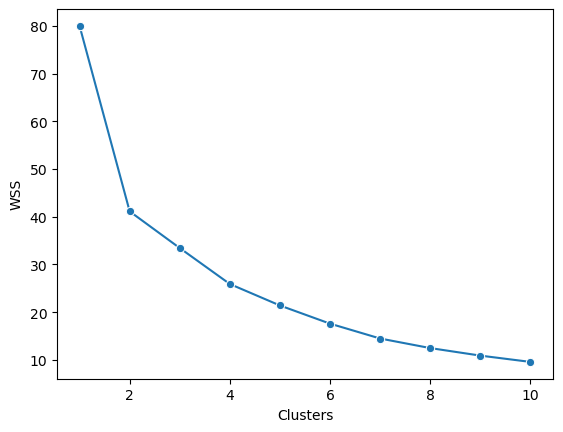

In [14]:
# Elbow method
from sklearn.cluster import KMeans
K = range(1,11)
wss = []
for k in K:
    kmeans=KMeans(n_clusters=k,n_init=10, init="k-means++")
    kmeans=kmeans.fit(df_scaled)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
centers = pd.DataFrame({'Clusters':K, 'WSS':wss})

sns.lineplot(x='Clusters', y='WSS', data=centers, marker='o')

In [ ]:
#Silhouette method
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the range of K values you want to explore (e.g., from 2 to 10)
k_values = range(2, 11)

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.show()


Both methods seem to indicate that, in our case, the ideal number of clusters is two.

# Clustering

Now we can fit the clustering algorithm.

In [15]:
num_clusters = 2
kmeans_model = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)

kmeans_model.fit(df_scaled)

cluster_labels = kmeans_model.labels_

df_scaled['cluster'] = cluster_labels
df_scaled.head()

,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils_(co2),pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,...,fires_in_organic_soils,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_-_male,total_population_-_female,total_emission,average_temperature_°c,cluster
0,0.000273,0.000002,1.160512e-02,0.004355,0.000000,0.002971,0.003663,0.966098,0.000000,0.002074,...,0.0,0.0,0.001639,0.023982,0.009833,0.018078,0.018587,0.076531,0.445314,0
1,0.000099,0.000226,1.367773e-03,0.001392,0.000526,0.000379,0.003541,0.966457,0.000000,0.000376,...,0.0,0.0,0.000981,0.002012,0.002421,0.002249,0.002348,0.074742,0.498319,0
2,0.001014,0.002735,1.024764e-02,0.000016,0.000000,0.003875,0.047753,0.965785,0.000315,0.058881,...,0.0,0.0,0.000559,0.015178,0.036677,0.025198,0.025348,0.092717,0.709857,0
3,0.000000,0.000000,3.506262e-07,0.007729,0.000000,0.000905,0.000251,0.967255,0.000007,0.000003,...,0.0,0.0,0.000123,0.000009,0.000080,0.000039,0.000040,0.075623,0.470463,0
4,0.000000,0.000000,6.115612e-07,0.006180,0.000000,0.000905,0.000693,0.967332,0.000000,0.000011,...,0.0,0.0,0.000236,0.000009,0.000110,0.000052,0.000051,0.075520,0.800577,0


This is the dataset with the cluster labels assigned to each country.

In [16]:
conditions = [
    df_scaled['cluster'] == 0,
    df_scaled['cluster'] == 1
]

labels = ['cluster 1', 'cluster 2']

df_imputed['label'] = np.select(conditions, labels)
df_imputed.head()

,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils_(co2),pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,...,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_-_male,total_population_-_female,total_emission,average_temperature_°c,area,label
0,15.088268,0.057477,316.749416,652.752835,0.000000,37.696717,206.740474,-823.084694,0.000000,466.443616,...,0.0,406.155719,1.910243e+07,5.879019e+06,1.231930e+07,1.212108e+07,7354.053024,0.817043,Afghanistan,cluster 1
1,5.479452,6.920468,37.332081,208.644010,109.796535,4.808637,199.839132,-583.764029,0.000000,84.632374,...,0.0,243.147055,1.602519e+06,1.447305e+06,1.532884e+06,1.531393e+06,3696.333040,0.886694,Albania,cluster 1
2,55.966177,83.767077,279.698342,2.462010,0.000000,49.161290,2693.397119,-1031.938477,390.495252,13243.906735,...,0.0,138.550023,1.208942e+07,2.192896e+07,1.717102e+07,1.653005e+07,40441.284232,1.164661,Algeria,cluster 1
3,0.000000,0.000000,0.009770,1158.468224,0.000000,11.481085,14.289010,-51.536487,8.325829,0.631913,...,0.0,30.451342,7.273871e+03,4.803539e+04,2.713742e+04,2.645381e+04,5498.122660,0.850089,American Samoa,cluster 1
4,0.000000,0.000000,0.016892,926.342278,0.000000,11.481085,39.210445,0.000000,0.000000,2.562623,...,0.0,58.507465,6.884548e+03,6.575887e+04,3.589603e+04,3.365468e+04,5287.553280,1.283871,Andorra,cluster 1


What are the cluster sizes? How many countries are in each clusters?

In [18]:
cluster_totals = df_imputed['label'].value_counts()
cluster_totals

cluster 1    231
cluster 2      5
Name: label, dtype: int64

Cluster 1 has almost all the countries, containing 231 countries total out of 236. While cluster 2 only contains 5 out of 236 countries.

In [19]:
cluster_1 = df_imputed.loc[df_imputed['label']=='cluster 1']
cluster_1_countries = cluster_1['area'].to_list()
countries_str = ", ".join(cluster_1_countries)
print(f"The countries in cluster 1 are {countries_str}")

The countries in cluster 1 are Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belgium-Luxembourg, Belize, Benin, Bermuda, Bhutan, Bolivia (Plurinational State of), Bosnia and Herzegovina, Botswana, Brazil, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cabo Verde, Cambodia, Cameroon, Canada, Cayman Islands, Central African Republic, Chad, Channel Islands, Chile, China, Hong Kong SAR, China, Macao SAR, China, Taiwan Province of, Colombia, Comoros, Congo, Cook Islands, Costa Rica, Croatia, Cuba, Cyprus, Czechia, Czechoslovakia, Democratic People's Republic of Korea, Democratic Republic of the Congo, Denmark, Djibouti, Dominica, Dominican Republic, Ecuador, Egypt, El Salvador, Equatorial Guinea, Eritrea, Estonia, Eswatini, Ethiopia, Ethiopia PDR, Falkland Islands (Malvinas), Faroe Islands, Fiji, Fi

In [21]:
cluster_2 = df_imputed.loc[df_imputed['label']=='cluster 2']
cluster_2_countries = cluster_2['area'].to_list()
countries_str = ", ".join(cluster_2_countries)
print(f"The countries in cluster 2 are {countries_str}")

The countries in cluster 2 are China, China, mainland, India, USSR, United States of America


# Let's compare each clusters

In [22]:
cols = df_imputed.select_dtypes(include='number').columns
grouped = df_imputed.groupby('label').agg({col:'mean' for col in cols})

grouped.head()

,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils_(co2),pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,...,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_-_male,total_population_-_female,total_emission,average_temperature_°c
label,,,,,,,,,,,,,,,,,,,,,
cluster 1,1258.055817,864.180900,379.271360,2275.254663,3203.874089,173.724404,1399.401455,-10175.300279,16181.114867,1923.813340,...,1056.888606,1177.188616,640.652746,1374.452451,7.652031e+06,9.165958e+06,8.445293e+06,8.569209e+06,4.120394e+04,0.873663
cluster 2,2151.848788,3055.113555,21850.045771,88650.168141,38986.044724,7379.909677,30309.566648,-414326.239359,16158.486863,123185.516863,...,54261.541008,0.000000,253.893546,105794.327639,4.893477e+08,3.873263e+08,4.446241e+08,4.292311e+08,1.125691e+06,0.844641


In [23]:
df_scaled.head()

,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils_(co2),pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,...,fires_in_organic_soils,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_-_male,total_population_-_female,total_emission,average_temperature_°c,cluster
0,0.000273,0.000002,1.160512e-02,0.004355,0.000000,0.002971,0.003663,0.966098,0.000000,0.002074,...,0.0,0.0,0.001639,0.023982,0.009833,0.018078,0.018587,0.076531,0.445314,0
1,0.000099,0.000226,1.367773e-03,0.001392,0.000526,0.000379,0.003541,0.966457,0.000000,0.000376,...,0.0,0.0,0.000981,0.002012,0.002421,0.002249,0.002348,0.074742,0.498319,0
2,0.001014,0.002735,1.024764e-02,0.000016,0.000000,0.003875,0.047753,0.965785,0.000315,0.058881,...,0.0,0.0,0.000559,0.015178,0.036677,0.025198,0.025348,0.092717,0.709857,0
3,0.000000,0.000000,3.506262e-07,0.007729,0.000000,0.000905,0.000251,0.967255,0.000007,0.000003,...,0.0,0.0,0.000123,0.000009,0.000080,0.000039,0.000040,0.075623,0.470463,0
4,0.000000,0.000000,6.115612e-07,0.006180,0.000000,0.000905,0.000693,0.967332,0.000000,0.000011,...,0.0,0.0,0.000236,0.000009,0.000110,0.000052,0.000051,0.075520,0.800577,0


In [24]:
cols = df_scaled.columns
grouped = df_scaled.groupby('cluster').agg({col:'mean' for col in cols})
grouped.drop('cluster',axis=1, inplace=True)
grouped.head()

,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils_(co2),pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,...,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_-_male,total_population_-_female,total_emission,average_temperature_°c
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.022802,0.028215,0.013896,0.015179,0.015336,0.013694,0.024810,0.952077,0.013043,0.008553,...,0.016468,0.004559,0.021146,0.005546,0.009607,0.015331,0.012393,0.013140,0.093090,0.488403
1,0.039002,0.099749,0.800546,0.591421,0.186615,0.581729,0.537402,0.346165,0.013024,0.547671,...,0.845811,0.000000,0.008380,0.426878,0.614352,0.647823,0.652495,0.658212,0.623595,0.466317


In [25]:
grouped_transposed = grouped.T
grouped_transposed

cluster,0,1
savanna_fires,0.022802,0.039002
forest_fires,0.028215,0.099749
crop_residues,0.013896,0.800546
rice_cultivation,0.015179,0.591421
drained_organic_soils_(co2),0.015336,0.186615
pesticides_manufacturing,0.013694,0.581729
food_transport,0.024810,0.537402
forestland,0.952077,0.346165
net_forest_conversion,0.013043,0.013024
food_household_consumption,0.008553,0.547671


In [26]:
grouped_transposed.index

Index(['savanna_fires', 'forest_fires', 'crop_residues', 'rice_cultivation',
       'drained_organic_soils_(co2)', 'pesticides_manufacturing',
       'food_transport', 'forestland', 'net_forest_conversion',
       'food_household_consumption', 'food_retail', 'on-farm_electricity_use',
       'food_packaging', 'agrifood_systems_waste_disposal', 'food_processing',
       'fertilizers_manufacturing', 'ippu', 'manure_applied_to_soils',
       'manure_left_on_pasture', 'manure_management', 'fires_in_organic_soils',
       'fires_in_humid_tropical_forests', 'on-farm_energy_use',
       'rural_population', 'urban_population', 'total_population_-_male',
       'total_population_-_female', 'total_emission',
       'average_temperature_°c'],
      dtype='object')

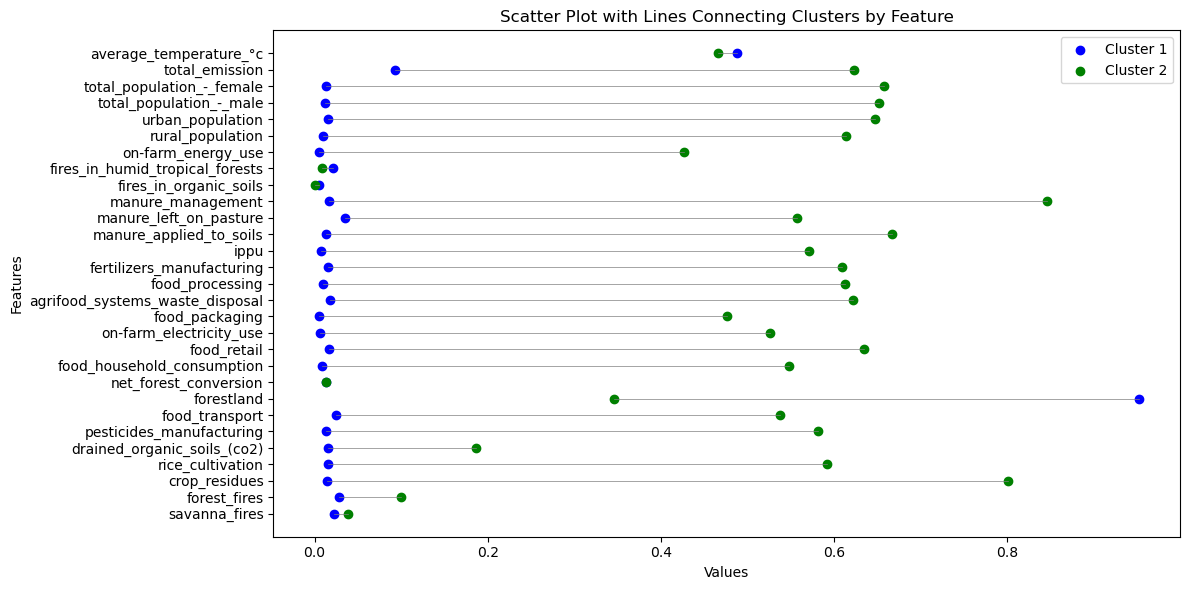

In [27]:
plt.figure(figsize=(12, 6))

# Scatter plot for Cluster 1
plt.scatter(grouped_transposed[0], grouped_transposed.index, label='Cluster 1', marker='o', color='blue')

# Scatter plot for Cluster 2
plt.scatter(grouped_transposed[1], grouped_transposed.index, label='Cluster 2', marker='o', color='green')

# Connecting the points by drawing lines between them
for feature, values_cluster1, values_cluster2 in zip(grouped_transposed.index, grouped_transposed[0], grouped_transposed[1]):
    plt.plot([values_cluster1, values_cluster2], [feature, feature], color='gray', linestyle='-', linewidth=0.5)

# x-axis and y-axis labels
plt.xlabel('Values')
plt.ylabel('Features')
plt.title('Scatter Plot with Lines Connecting Clusters by Feature')

plt.legend()
plt.tight_layout()
plt.show()


* Countries in cluster 1 exhibit a slightly higher increase in average temperature compared to those in cluster 2.
* Cluster 2 is characterized by higher total emissions and elevated emissions across various sectors (e.g., Food Transport, Fires, waste disposal, etc.).
* Countries in cluster 2 also have higher population, rural and urban, on average compared to countries in cluster 1.
* Interestingly, countries in cluster 1 have significantly more forest land, which acts as a carbon sink and leads to negative emissions. Forests absorb and store carbon dioxide through photosynthesis, effectively removing it from the atmosphere. Sustainable forest management, afforestation, and reforestation efforts contribute to this negative emission effect by enhancing carbon sequestration capacity.

In [41]:
cols = ['total_emission','urban_population','rural_population','forestland','average_temperature_°c']
df_grouped[cols].describe()

,total_emission,urban_population,rural_population,forestland,average_temperature_°c
count,2.360000e+02,2.360000e+02,2.360000e+02,220.000000,236.000000
mean,6.418036e+04,1.717783e+07,1.785745e+07,-19962.942611,0.873048
std,2.108853e+05,6.288802e+07,8.655375e+07,84616.343526,0.278962
min,-1.490950e+05,0.000000e+00,0.000000e+00,-645223.089962,0.231883
25%,5.320299e+03,2.672723e+05,1.055956e+05,-3768.689545,0.696947
50%,1.277073e+04,2.497504e+06,1.750391e+06,-215.504747,0.808707
75%,3.542590e+04,8.602329e+06,8.602849e+06,0.000000,1.065228
max,1.895156e+06,5.978892e+08,7.965270e+08,21790.038374,1.545921


In [46]:
df_imputed.head()

,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils_(co2),pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,...,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_-_male,total_population_-_female,total_emission,average_temperature_°c,area,label
0,15.088268,0.057477,316.749416,652.752835,0.000000,37.696717,206.740474,-823.084694,0.000000,466.443616,...,0.0,406.155719,1.910243e+07,5.879019e+06,1.231930e+07,1.212108e+07,7354.053024,0.817043,Afghanistan,cluster 1
1,5.479452,6.920468,37.332081,208.644010,109.796535,4.808637,199.839132,-583.764029,0.000000,84.632374,...,0.0,243.147055,1.602519e+06,1.447305e+06,1.532884e+06,1.531393e+06,3696.333040,0.886694,Albania,cluster 1
2,55.966177,83.767077,279.698342,2.462010,0.000000,49.161290,2693.397119,-1031.938477,390.495252,13243.906735,...,0.0,138.550023,1.208942e+07,2.192896e+07,1.717102e+07,1.653005e+07,40441.284232,1.164661,Algeria,cluster 1
3,0.000000,0.000000,0.009770,1158.468224,0.000000,11.481085,14.289010,-51.536487,8.325829,0.631913,...,0.0,30.451342,7.273871e+03,4.803539e+04,2.713742e+04,2.645381e+04,5498.122660,0.850089,American Samoa,cluster 1
4,0.000000,0.000000,0.016892,926.342278,0.000000,11.481085,39.210445,0.000000,0.000000,2.562623,...,0.0,58.507465,6.884548e+03,6.575887e+04,3.589603e+04,3.365468e+04,5287.553280,1.283871,Andorra,cluster 1


In [51]:
df_final = df_imputed
df_final.head()

,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils_(co2),pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,...,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_-_male,total_population_-_female,total_emission,average_temperature_°c,area,label
0,15.088268,0.057477,316.749416,652.752835,0.000000,37.696717,206.740474,-823.084694,0.000000,466.443616,...,0.0,406.155719,1.910243e+07,5.879019e+06,1.231930e+07,1.212108e+07,7354.053024,0.817043,Afghanistan,cluster 1
1,5.479452,6.920468,37.332081,208.644010,109.796535,4.808637,199.839132,-583.764029,0.000000,84.632374,...,0.0,243.147055,1.602519e+06,1.447305e+06,1.532884e+06,1.531393e+06,3696.333040,0.886694,Albania,cluster 1
2,55.966177,83.767077,279.698342,2.462010,0.000000,49.161290,2693.397119,-1031.938477,390.495252,13243.906735,...,0.0,138.550023,1.208942e+07,2.192896e+07,1.717102e+07,1.653005e+07,40441.284232,1.164661,Algeria,cluster 1
3,0.000000,0.000000,0.009770,1158.468224,0.000000,11.481085,14.289010,-51.536487,8.325829,0.631913,...,0.0,30.451342,7.273871e+03,4.803539e+04,2.713742e+04,2.645381e+04,5498.122660,0.850089,American Samoa,cluster 1
4,0.000000,0.000000,0.016892,926.342278,0.000000,11.481085,39.210445,0.000000,0.000000,2.562623,...,0.0,58.507465,6.884548e+03,6.575887e+04,3.589603e+04,3.365468e+04,5287.553280,1.283871,Andorra,cluster 1


Comparing the clusters with the actual values. 

In [62]:
df_final.drop('area', axis=1, inplace=True)
pd.options.display.float_format = '{:.2f}'.format
cols = df_final.select_dtypes(include='number').columns
grouped = df_final.groupby('label').agg({col:'mean' for col in cols})
#grouped.drop('label',axis=1, inplace=True)
grouped.head()

grouped_transposed = grouped.T
grouped_transposed

label,cluster 1,cluster 2
savanna_fires,1258.06,2151.85
forest_fires,864.18,3055.11
crop_residues,379.27,21850.05
rice_cultivation,2275.25,88650.17
drained_organic_soils_(co2),3203.87,38986.04
pesticides_manufacturing,173.72,7379.91
food_transport,1399.40,30309.57
forestland,-10175.30,-414326.24
net_forest_conversion,16181.11,16158.49
food_household_consumption,1923.81,123185.52


Wow! The countries in Cluster 2 exhibit greenhouse gas emissions nearly 30 times higher on average compared to those in Cluster 1. This stark contrast in emissions profiles highlights the effectiveness of our clustering analysis in successfully identifying and grouping countries based on their emission levels and other relevant factors.

In conclusion, this clustering analysis has proven to be a valuable tool in discerning and characterizing the variations between countries in terms of greenhouse gas emissions and related parameters. By identifying distinct clusters, we gain valuable insights into the diverse emission patterns across regions, aiding in the development of targeted strategies and policies to address the specific challenges and opportunities presented by each cluster.